# Analisis exploratorio

### - Importemos las librerías necesarias como Pandas, Matplotlib y seaborn

In [2]:
# Importar librerías 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Leamos el dataset en un DataFrame de Pandas

In [3]:
# Leer dataset
df = pd.read_csv("../../tableClaudePeriod.csv")

### Utilicemos métodos como .info(), .describe(), .value_counts() para explorar datos faltantes, tipos de datos, distribución

In [4]:
# Resumen y info básica
print(df.shape)
print(df.info())
print(df.describe())

(22, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   periodo  22 non-null     object
 1   sem1     22 non-null     int64 
 2   sem2     22 non-null     int64 
 3   sem3     22 non-null     int64 
 4   sem4     22 non-null     int64 
 5   sem5     22 non-null     int64 
 6   sem6     22 non-null     int64 
 7   sem7     22 non-null     int64 
 8   sem8     22 non-null     int64 
 9   sem9     22 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.8+ KB
None
            sem1       sem2       sem3       sem4       sem5       sem6  \
count  22.000000  22.000000  22.000000  22.000000  22.000000  22.000000   
mean    2.636364  22.545455  19.318182  17.590909  15.500000  13.500000   
std     1.255292   4.183041   3.014036   3.142021   2.703613   4.228588   
min     0.000000  14.000000  13.000000  12.000000  12.000000   0.000000   
25%     2.0000

### Graficamos variables individuales y entre pares con .hist() y seaborn para entender relaciones

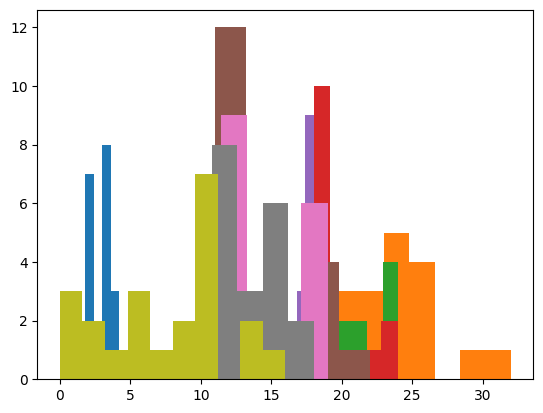

In [6]:
# Distribuciones de las variabels 
for i in range(1,10):
  columna = "sem" + str(i)
  plt.hist(df[columna])


### Detectemos outliers con boxplots y percentiles

In [7]:
# Outliers   
for i in range(1,10):
  columna = "sem" + str(i)
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  
  outliers = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]

  print("Outliers semester", i, ":", len(outliers))
  

Outliers semester 1 : 2
Outliers semester 2 : 1
Outliers semester 3 : 1
Outliers semester 4 : 8
Outliers semester 5 : 0
Outliers semester 6 : 1
Outliers semester 7 : 2
Outliers semester 8 : 2
Outliers semester 9 : 0


### Visualicemos la serie de tiempo para identificar tendencias, estacionalidad, ruido

<Axes: >

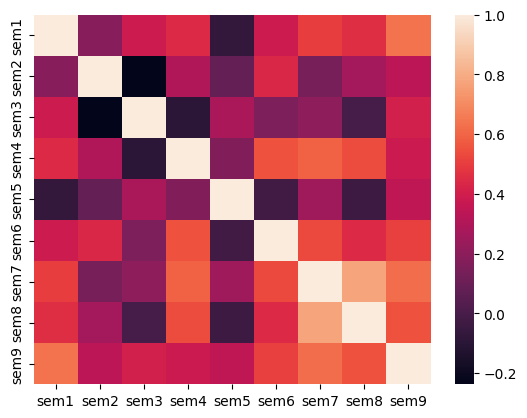

In [8]:
# Correlaciones
corr = df.iloc[:, 1:].corr() 
sns.heatmap(corr)

In [12]:
#Convertir a datetime de string, periodo para poder procesarlo en la siguiente celda
df['periodo'] = pd.to_datetime(df['periodo'])

AttributeError: 'DatetimeProperties' object has no attribute 'season'

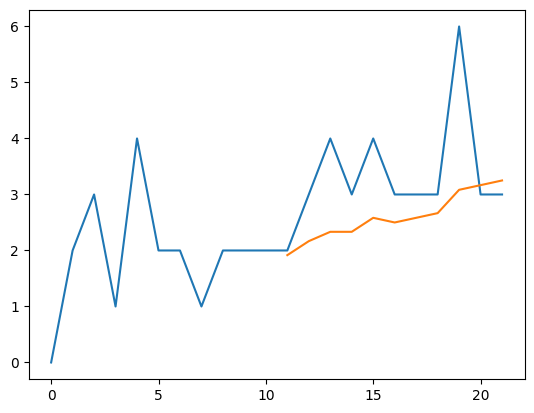

In [13]:
# Loop para cada semestre
for i in range(1,10):

  columna = 'sem'+str(i)
  
  # Graficar 
  df[columna].plot()
  
  # Media movil
  df[columna].rolling(12).mean().plot()

  # Estacionalidad
  df.groupby(df['periodo'].dt.season)[columna].mean().plot() 

  # ACF y PACF
  plot_acf(df[columna])
  plot_pacf(df[columna])